## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.layers import Dropout 
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, out_units=10, num_neurons=[512, 256, 128, 64],drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    out = keras.layers.Dense(units=out_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.15, 0.2, 0.25]
OPTIMIZER =[keras.optimizers.SGD, keras.optimizers.Adam]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp, opti in itertools.product(Dropout_EXP, OPTIMIZER):
    keras.backend.clear_session()
    tag = str(opti)
    tag2 = tag.split('.',3)[2]
    print('dropout ratio:{} optimizer:{}'.format(str(drp), tag2.split('\'',2)[0]))
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
    model.summary()
    
    optimizer = opti(lr=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
   
    # Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = 'dropout ratio:{} optimizer:{}'.format(str(drp), tag2.split('\'',2)[0])
    results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss,
                         'train-acc': train_acc, 'valid-acc': valid_acc}

dropout ratio:0.15 optimizer:SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)       

50000/50000 [==============================] - 14s 276us/step - loss: 1.9092 - accuracy: 0.3058 - val_loss: 1.8309 - val_accuracy: 0.3575
Epoch 44/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.9050 - accuracy: 0.3066 - val_loss: 1.8264 - val_accuracy: 0.3594
Epoch 45/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.9012 - accuracy: 0.3094 - val_loss: 1.8228 - val_accuracy: 0.3603
Epoch 46/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.8980 - accuracy: 0.3105 - val_loss: 1.8192 - val_accuracy: 0.3624
Epoch 47/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.8946 - accuracy: 0.3106 - val_loss: 1.8157 - val_accuracy: 0.3647
Epoch 48/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.8933 - accuracy: 0.3157 - val_loss: 1.8125 - val_accuracy: 0.3650
Epoch 49/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.8874 - accuracy: 0.3157 - va

50000/50000 [==============================] - 17s 343us/step - loss: 1.3673 - accuracy: 0.5122 - val_loss: 1.4260 - val_accuracy: 0.4887
Epoch 37/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.3655 - accuracy: 0.5129 - val_loss: 1.3593 - val_accuracy: 0.5217
Epoch 38/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.3501 - accuracy: 0.5166 - val_loss: 1.3598 - val_accuracy: 0.5220
Epoch 39/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.3545 - accuracy: 0.5140 - val_loss: 1.3742 - val_accuracy: 0.5110
Epoch 40/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.3515 - accuracy: 0.5171 - val_loss: 1.3710 - val_accuracy: 0.5152
Epoch 41/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.3450 - accuracy: 0.5199 - val_loss: 1.3739 - val_accuracy: 0.5180
Epoch 42/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.3339 - accuracy: 0.5224 - va

50000/50000 [==============================] - 14s 281us/step - loss: 2.0238 - accuracy: 0.2517 - val_loss: 1.9423 - val_accuracy: 0.3107
Epoch 30/50
50000/50000 [==============================] - 14s 284us/step - loss: 2.0178 - accuracy: 0.2544 - val_loss: 1.9365 - val_accuracy: 0.3149
Epoch 31/50
50000/50000 [==============================] - 15s 308us/step - loss: 2.0095 - accuracy: 0.2597 - val_loss: 1.9311 - val_accuracy: 0.3140
Epoch 32/50
50000/50000 [==============================] - 15s 304us/step - loss: 2.0051 - accuracy: 0.2588 - val_loss: 1.9243 - val_accuracy: 0.3150
Epoch 33/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.0033 - accuracy: 0.2589 - val_loss: 1.9215 - val_accuracy: 0.3180
Epoch 34/50
50000/50000 [==============================] - 14s 284us/step - loss: 2.0002 - accuracy: 0.2634 - val_loss: 1.9167 - val_accuracy: 0.3177
Epoch 35/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.9945 - accuracy: 0.2634 - va

50000/50000 [==============================] - 17s 341us/step - loss: 1.5581 - accuracy: 0.4408 - val_loss: 1.4863 - val_accuracy: 0.4731
Epoch 23/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.5531 - accuracy: 0.4442 - val_loss: 1.4634 - val_accuracy: 0.4845
Epoch 24/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.5407 - accuracy: 0.4502 - val_loss: 1.4793 - val_accuracy: 0.4786
Epoch 25/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.5364 - accuracy: 0.4520 - val_loss: 1.4436 - val_accuracy: 0.4842
Epoch 26/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.5237 - accuracy: 0.4546 - val_loss: 1.4649 - val_accuracy: 0.4786
Epoch 27/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.5275 - accuracy: 0.4528 - val_loss: 1.4527 - val_accuracy: 0.4840
Epoch 28/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.5198 - accuracy: 0.4564 - va

50000/50000 [==============================] - 14s 287us/step - loss: 2.1766 - accuracy: 0.1856 - val_loss: 2.0965 - val_accuracy: 0.2433
Epoch 16/50
50000/50000 [==============================] - 14s 288us/step - loss: 2.1629 - accuracy: 0.1914 - val_loss: 2.0835 - val_accuracy: 0.2470
Epoch 17/50
50000/50000 [==============================] - 14s 287us/step - loss: 2.1529 - accuracy: 0.1947 - val_loss: 2.0715 - val_accuracy: 0.2548
Epoch 18/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.1411 - accuracy: 0.2016 - val_loss: 2.0593 - val_accuracy: 0.2629
Epoch 19/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.1336 - accuracy: 0.2065 - val_loss: 2.0489 - val_accuracy: 0.2687
Epoch 20/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.1212 - accuracy: 0.2105 - val_loss: 2.0379 - val_accuracy: 0.2704
Epoch 21/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.1166 - accuracy: 0.2110 - va

50000/50000 [==============================] - 17s 341us/step - loss: 1.7425 - accuracy: 0.3732 - val_loss: 1.6422 - val_accuracy: 0.4215
Epoch 9/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.7298 - accuracy: 0.3782 - val_loss: 1.6748 - val_accuracy: 0.4163
Epoch 10/50
50000/50000 [==============================] - 17s 348us/step - loss: 1.7205 - accuracy: 0.3798 - val_loss: 1.6609 - val_accuracy: 0.4218
Epoch 11/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.7006 - accuracy: 0.3899 - val_loss: 1.6230 - val_accuracy: 0.4299
Epoch 12/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.6933 - accuracy: 0.3916 - val_loss: 1.6189 - val_accuracy: 0.4360
Epoch 13/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.6817 - accuracy: 0.3966 - val_loss: 1.5876 - val_accuracy: 0.4421
Epoch 14/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.6759 - accuracy: 0.3956 - val

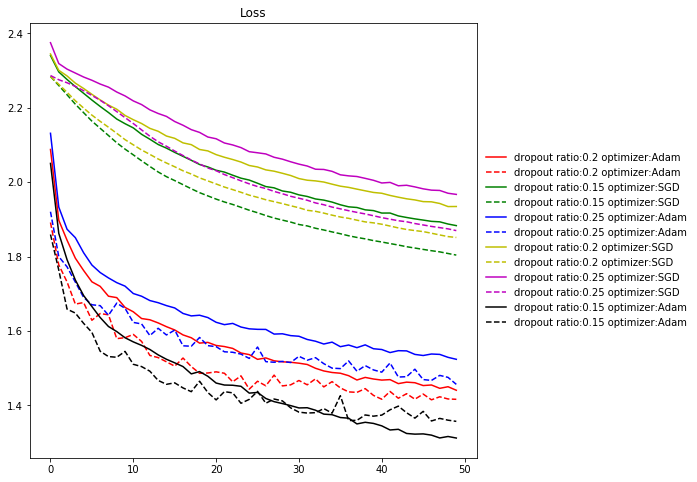

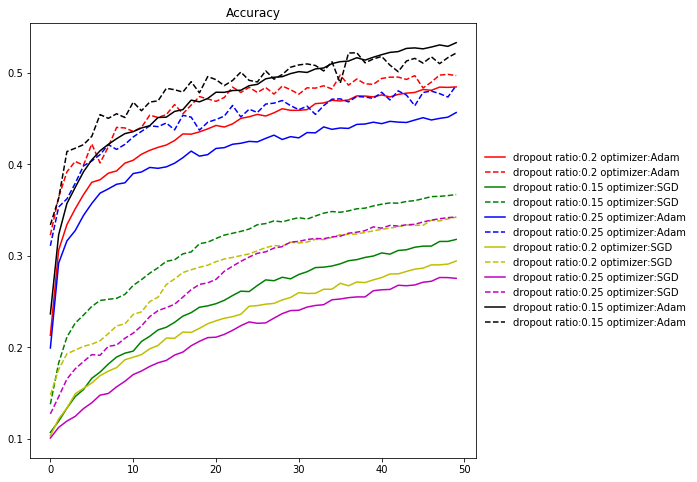

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r','g','b','y','m','k','gray','c']

plt.figure(figsize=(8,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

plt.figure(figsize=(8,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()